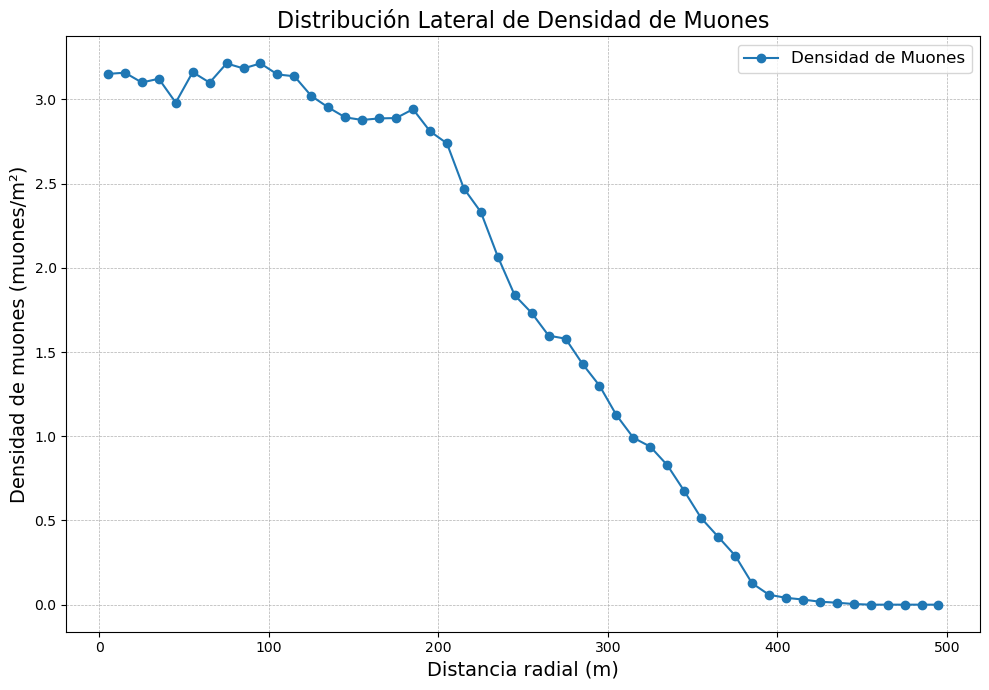

In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

# --- CONFIGURACIÓN ---
file_path = "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_pr1.root"  # Cambia según sea necesario
tree_name = "comb;1"  # Árbol a usar

# Parámetros para la densidad
bin_size = 10  # Tamaño de los anillos en metros
max_radius = 500  # Radio máximo para análisis

# Leer datos del archivo ROOT
with uproot.open(file_path) as file:
    tree = file[tree_name]
    x_core = tree["Xc"].array(library="np")  # Coordenada reconstruida X del núcleo
    y_core = tree["Yc"].array(library="np")  # Coordenada reconstruida Y del núcleo
    nmu = tree["Nmu"].array(library="np")  # Número reconstruido de muones

# Calcular distancia radial r desde el núcleo para cada evento
r = np.sqrt((x_core - x_core.mean())**2 + (y_core - y_core.mean())**2)

# Crear bins radiales
bins = np.arange(0, max_radius + bin_size, bin_size)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
densities = []

# Calcular densidad en cada anillo
for i in range(len(bins) - 1):
    in_bin = (r >= bins[i]) & (r < bins[i + 1])  # Eventos en el anillo
    count = np.sum(nmu[in_bin])  # Número de muones en el anillo
    area = np.pi * (bins[i + 1]**2 - bins[i]**2)  # Área del anillo
    density = count / area  # Densidad en el anillo
    densities.append(density)

# Convertir densidades a numpy array
densities = np.array(densities)

# Graficar densidad de muones
plt.figure(figsize=(10, 7))
plt.plot(bin_centers, densities, marker='o', linestyle='-', label='Densidad de Muones')
plt.xlabel("Distancia radial (m)", fontsize=14)
plt.ylabel("Densidad de muones (muones/m²)", fontsize=14)
plt.title("Distribución Lateral de Densidad de Muones", fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


Procesando Proton...
Procesando Helium...
Procesando Carbon...
Procesando Silicon...
Procesando Iron...
Procesando Gamma...
Procesando Proton...
Procesando Helium...
Procesando Carbon...
Procesando Silicon...
Procesando Iron...
Procesando Gamma...


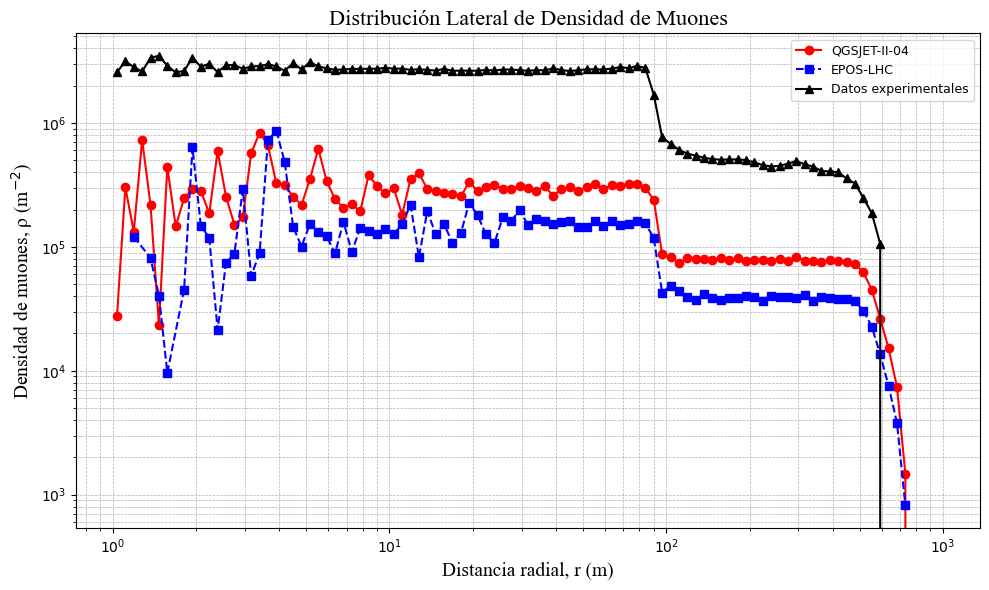

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

# --- CONFIGURACIÓN ---
qgsjet_files = {
    "Proton": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_pr1.root",
    "Helium": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_he1.root",
    "Carbon": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_co1.root",
    "Silicon": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_si1.root",
    "Iron": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_fe1.root",
    "Gamma": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_gm1.root"
}

epos_files = {
    "Proton": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_pr.root",
    "Helium": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_he.root",
    "Carbon": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_co.root",
    "Silicon": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_si.root",
    "Iron": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_fe.root",
    "Gamma": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_gm.root"
}

exp_file = "C:/Users/MSI/extraidos/events.root"

# --- FUNCIONES ---
def calcular_densidad_lateral(file_path, tree_name="comb;1"):
    """Calcula la densidad lateral de muones a partir de un archivo ROOT."""
    tree = uproot.open(file_path)[tree_name]
    
    # Cargar variables necesarias
    xc = tree["Xc"].array(library="np")
    yc = tree["Yc"].array(library="np")
    nmu = 10 ** tree["Nmu"].array(library="np")  # Convertir log10(Nmu) a valores reales
    
    # Calcular distancias radiales
    r = np.sqrt(xc**2 + yc**2)
    
    # Definir bins radiales (sin restricción de radio máximo)
    bins = np.logspace(0, 3, 100)  # 100 bins desde 1 m hasta 1000 m
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    
    # Calcular densidad lateral
    hist, _ = np.histogram(r, bins=bins, weights=nmu)
    areas = np.pi * (bins[1:]**2 - bins[:-1]**2)  # Áreas de anillos concéntricos
    densidad = hist / areas  # Densidad en [muones/m²]
    
    return bin_centers, densidad

# --- SUMAR DENSIDADES POR MODELO ---
def calcular_densidad_total(files):
    """Suma la densidad lateral de muones para todos los primarios de un modelo hadrónico."""
    total_density = np.zeros(99)  # 99 bins de densidad
    bin_centers_global = None
    
    for primario, file_path in files.items():
        print(f"Procesando {primario}...")
        bin_centers, densidad = calcular_densidad_lateral(file_path)
        bin_centers_global = bin_centers
        total_density += densidad
    
    return bin_centers_global, total_density

# --- DENSIDAD TOTAL DE QGSJET Y EPOS ---
bin_centers_qgsjet, qgsjet_density = calcular_densidad_total(qgsjet_files)
bin_centers_epos, epos_density = calcular_densidad_total(epos_files)

# --- DENSIDAD EXPERIMENTAL ---
def calcular_densidad_experimental():
    """Calcula la densidad lateral de muones para los datos experimentales."""
    tree = uproot.open(exp_file)["combined"]
    
    xc = tree["Xc"].array(library="np")
    yc = tree["Yc"].array(library="np")
    nmu = 10 ** tree["Nmu"].array(library="np")
    
    r = np.sqrt(xc**2 + yc**2)
    
    bins = np.logspace(0, 3, 100)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    
    hist, _ = np.histogram(r, bins=bins, weights=nmu)
    areas = np.pi * (bins[1:]**2 - bins[:-1]**2)
    densidad = hist / areas  # Densidad en [muones/m²]
    
    return bin_centers, densidad

bin_centers_exp, exp_density = calcular_densidad_experimental()

# --- GRAFICAR RESULTADOS ---
plt.figure(figsize=(10, 6))

# Filtrar puntos problemáticos en EPOS (NaN o ceros en los primeros bins)
valid_epos = (epos_density > 0) & ~np.isnan(epos_density)
bin_centers_epos_filtered = bin_centers_epos[valid_epos]
epos_density_filtered = epos_density[valid_epos]

# Graficar modelos sin valores atípicos
plt.loglog(bin_centers_qgsjet, qgsjet_density, marker='o', linestyle='-', label="QGSJET-II-04", color='red')
plt.loglog(bin_centers_epos_filtered, epos_density_filtered, marker='s', linestyle='--', label="EPOS-LHC", color='blue')
plt.loglog(bin_centers_exp, exp_density, marker='^', linestyle='-', label="Datos experimentales", color='black')

plt.xlabel("Distancia radial, r (m)", fontsize=14, fontname='Times New Roman')
plt.ylabel("Densidad de muones, ρ (m$^{-2}$)", fontsize=14, fontname='Times New Roman')
plt.title("Distribución Lateral de Densidad de Muones", fontsize=16, fontname='Times New Roman')

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(fontsize=9, loc="upper right")

plt.tight_layout()
plt.savefig("Distribucion Lateral Muones.pdf",dpi=600)
plt.show()


Procesando Proton...
Procesando Helium...
Procesando Carbon...
Procesando Silicon...
Procesando Iron...
Procesando Gamma...
Procesando Proton...
Procesando Helium...
Procesando Carbon...
Procesando Silicon...
Procesando Iron...
Procesando Gamma...


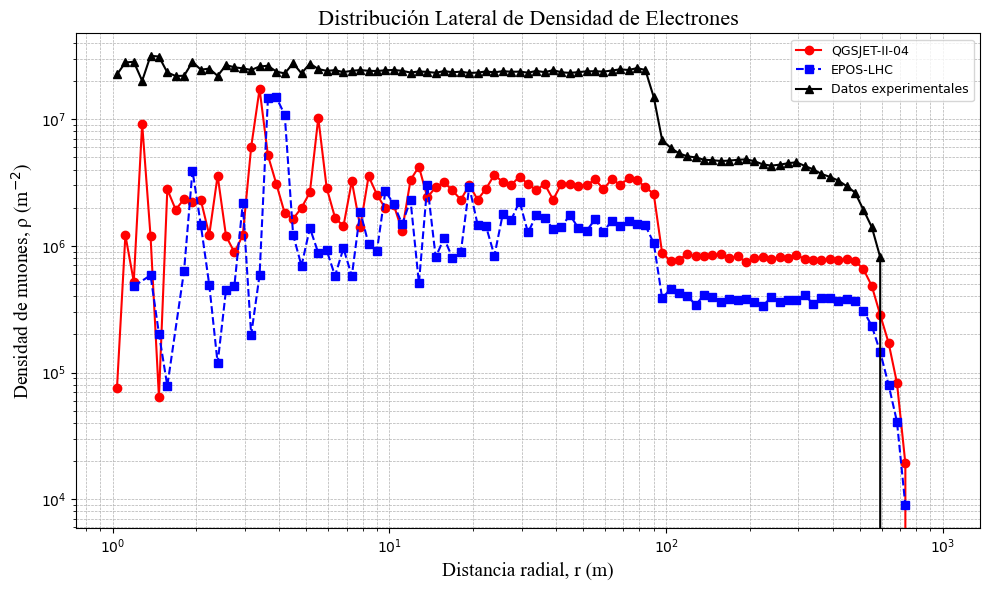

In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

# --- CONFIGURACIÓN ---
qgsjet_files = {
    "Proton": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_pr1.root",
    "Helium": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_he1.root",
    "Carbon": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_co1.root",
    "Silicon": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_si1.root",
    "Iron": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_fe1.root",
    "Gamma": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_gm1.root"
}

epos_files = {
    "Proton": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_pr.root",
    "Helium": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_he.root",
    "Carbon": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_co.root",
    "Silicon": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_si.root",
    "Iron": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_fe.root",
    "Gamma": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_gm.root"
}

exp_file = "C:/Users/MSI/extraidos/events.root"

# --- FUNCIONES ---
def calcular_densidad_lateral(file_path, tree_name="comb;1"):
    """Calcula la densidad lateral de muones a partir de un archivo ROOT."""
    tree = uproot.open(file_path)[tree_name]
    
    # Cargar variables necesarias
    xc = tree["Xc"].array(library="np")
    yc = tree["Yc"].array(library="np")
    nmu = 10 ** tree["Ne"].array(library="np")  # Convertir log10(Nmu) a valores reales
    
    # Calcular distancias radiales
    r = np.sqrt(xc**2 + yc**2)
    
    # Definir bins radiales (sin restricción de radio máximo)
    bins = np.logspace(0, 3, 100)  # 100 bins desde 1 m hasta 1000 m
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    
    # Calcular densidad lateral
    hist, _ = np.histogram(r, bins=bins, weights=nmu)
    areas = np.pi * (bins[1:]**2 - bins[:-1]**2)  # Áreas de anillos concéntricos
    densidad = hist / areas  # Densidad en [muones/m²]
    
    return bin_centers, densidad

# --- SUMAR DENSIDADES POR MODELO ---
def calcular_densidad_total(files):
    """Suma la densidad lateral de muones para todos los primarios de un modelo hadrónico."""
    total_density = np.zeros(99)  # 99 bins de densidad
    bin_centers_global = None
    
    for primario, file_path in files.items():
        print(f"Procesando {primario}...")
        bin_centers, densidad = calcular_densidad_lateral(file_path)
        bin_centers_global = bin_centers
        total_density += densidad
    
    return bin_centers_global, total_density

# --- DENSIDAD TOTAL DE QGSJET Y EPOS ---
bin_centers_qgsjet, qgsjet_density = calcular_densidad_total(qgsjet_files)
bin_centers_epos, epos_density = calcular_densidad_total(epos_files)

# --- DENSIDAD EXPERIMENTAL ---
def calcular_densidad_experimental():
    """Calcula la densidad lateral de muones para los datos experimentales."""
    tree = uproot.open(exp_file)["combined"]
    
    xc = tree["Xc"].array(library="np")
    yc = tree["Yc"].array(library="np")
    nmu = 10 ** tree["Ne"].array(library="np")
    
    r = np.sqrt(xc**2 + yc**2)
    
    bins = np.logspace(0, 3, 100)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    
    hist, _ = np.histogram(r, bins=bins, weights=nmu)
    areas = np.pi * (bins[1:]**2 - bins[:-1]**2)
    densidad = hist / areas  # Densidad en [muones/m²]
    
    return bin_centers, densidad

bin_centers_exp, exp_density = calcular_densidad_experimental()

# --- GRAFICAR RESULTADOS ---
plt.figure(figsize=(10, 6))

# Filtrar puntos problemáticos en EPOS (NaN o ceros en los primeros bins)
valid_epos = (epos_density > 0) & ~np.isnan(epos_density)
bin_centers_epos_filtered = bin_centers_epos[valid_epos]
epos_density_filtered = epos_density[valid_epos]

# Graficar modelos sin valores atípicos
plt.loglog(bin_centers_qgsjet, qgsjet_density, marker='o', linestyle='-', label="QGSJET-II-04", color='red')
plt.loglog(bin_centers_epos_filtered, epos_density_filtered, marker='s', linestyle='--', label="EPOS-LHC", color='blue')
plt.loglog(bin_centers_exp, exp_density, marker='^', linestyle='-', label="Datos experimentales", color='black')

plt.xlabel("Distancia radial, r (m)", fontsize=14, fontname='Times New Roman')
plt.ylabel("Densidad de muones, ρ (m$^{-2}$)", fontsize=14, fontname='Times New Roman')
plt.title("Distribución Lateral de Densidad de Electrones", fontsize=16, fontname='Times New Roman')

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(fontsize=9, loc="upper right")

plt.tight_layout()
plt.savefig("Distribucion_Lateral_Electrones.pdf",dpi=600)
plt.show()